In [1]:
# Import our dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
file_path = './Resources/processed_PLACES_COPD.csv'

In [3]:
# Importing the dataset
dataset = pd.read_csv(file_path)


In [4]:
dataset.head()

,State_County,State,County,Levels_Smokers,Levels_COPD
0,"Cass, Iowa",Iowa,Cass,19.3,8.3
1,"Monona, Iowa",Iowa,Monona,18.5,8.3
2,"Dillingham, Alaska",Alaska,Dillingham,31.1,8.9
3,"Custer, Colorado",Colorado,Custer,13.8,7.5
4,"Ketchikan Gateway, Alaska",Alaska,Ketchikan Gateway,19.4,6.6


In [5]:
# dataset['Total_Population']= dataset['Total_Population'].astype(float)

In [6]:
le = LabelEncoder()
df2 = dataset.copy()

In [7]:
# Generate our categorical variable lists
dataset_cat = dataset.dtypes[dataset.dtypes == "object"].index.tolist()
dataset_cat

['State_County', 'State', 'County']

In [8]:
# For loop to encode text columns to numerical values
for textColumn in dataset_cat:
    df2[textColumn] = le.fit_transform(df2[textColumn])

In [9]:
# Display dataframe
df2

,State_County,State,County,Levels_Smokers,Levels_COPD
0,414,15,270,19.3,8.3
1,1938,15,1104,18.5,8.3
2,778,1,477,31.1,8.9
3,688,5,426,13.8,7.5
4,1484,1,869,19.4,6.6
...,...,...,...,...,...
3117,2515,49,1462,16.8,6.5
3118,290,49,209,15.1,5.5
3119,2994,48,1745,26.8,15.3
3120,3058,49,1785,17.1,5.8


In [10]:
#X = dataset.drop(['Levels_COPD'], axis = 1).values
#y = dataset['Levels_COPD']

In [11]:
# Create our features
a_cols = [i for i in df2.columns if i not in ('Levels_COPD')]
X = df2[a_cols]

# Create our target
y = df2['Levels_COPD']

In [12]:
# Step 3: Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [13]:
# Create a OneHotEncoder instance
# enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
# encode_df = pd.DataFrame(enc.fit_transform(dataset[dataset_cat]))

# Add the encoded variable names to the dataframe
# encode_df.columns = enc.get_feature_names_out(dataset_cat)

# Set options to show all columns
# pd.options.display.max_columns = 50

# View the dataframe
# encode_df.head()

In [14]:
# Step 4: Training the Random Forest Regression model on the training set

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [15]:
# Step 5: Predicting the Results
y_pred = regressor.predict(X_test)
y_pred

array([ 8.69, 11.37,  7.12,  6.99,  5.17,  9.04, 11.04,  9.35,  9.98,
        9.7 ,  9.79, 10.74,  8.39,  7.32,  7.22,  6.15,  9.85, 10.09,
        6.62,  6.91,  6.72,  8.61,  8.11, 11.54, 12.19,  7.25,  5.95,
        9.73,  7.32,  7.12,  8.59, 13.2 , 11.24,  5.09,  6.88,  9.97,
        9.48,  7.22,  9.62, 11.33,  9.62,  9.03,  7.47,  7.71,  9.45,
       10.38, 10.23,  6.82,  7.57,  7.1 ,  6.49,  9.77,  7.85, 10.81,
        8.11, 12.69,  7.47,  9.04,  8.37,  7.11,  5.76,  6.5 ,  8.62,
        8.4 ,  9.49, 10.96,  8.56, 10.41,  7.02,  7.43,  7.86,  9.4 ,
        7.1 ,  5.14, 10.98,  8.18,  8.66, 12.1 ,  7.44,  9.15,  8.24,
        7.54,  8.48,  6.65, 12.46,  7.15,  9.88, 12.4 ,  9.04,  6.59,
        6.81,  6.89,  7.05,  6.42, 12.38, 12.01,  5.41,  7.92, 10.55,
        9.55,  7.25,  9.83,  6.93,  5.82, 11.28,  7.46,  6.11, 10.02,
        9.16,  5.33,  7.37,  6.6 ,  8.4 , 10.3 ,  6.18,  8.88,  9.87,
       14.3 ,  7.68, 11.87,  7.43,  6.52,  6.2 , 11.9 ,  7.66, 15.28,
       10.93, 11.3 ,

In [16]:
# Step 6: Evaluating the Algorithm
from sklearn import metrics 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 1.1778207772999636


In [17]:
regressor.feature_importances_

array([0.06137298, 0.08833426, 0.05279412, 0.79749864])

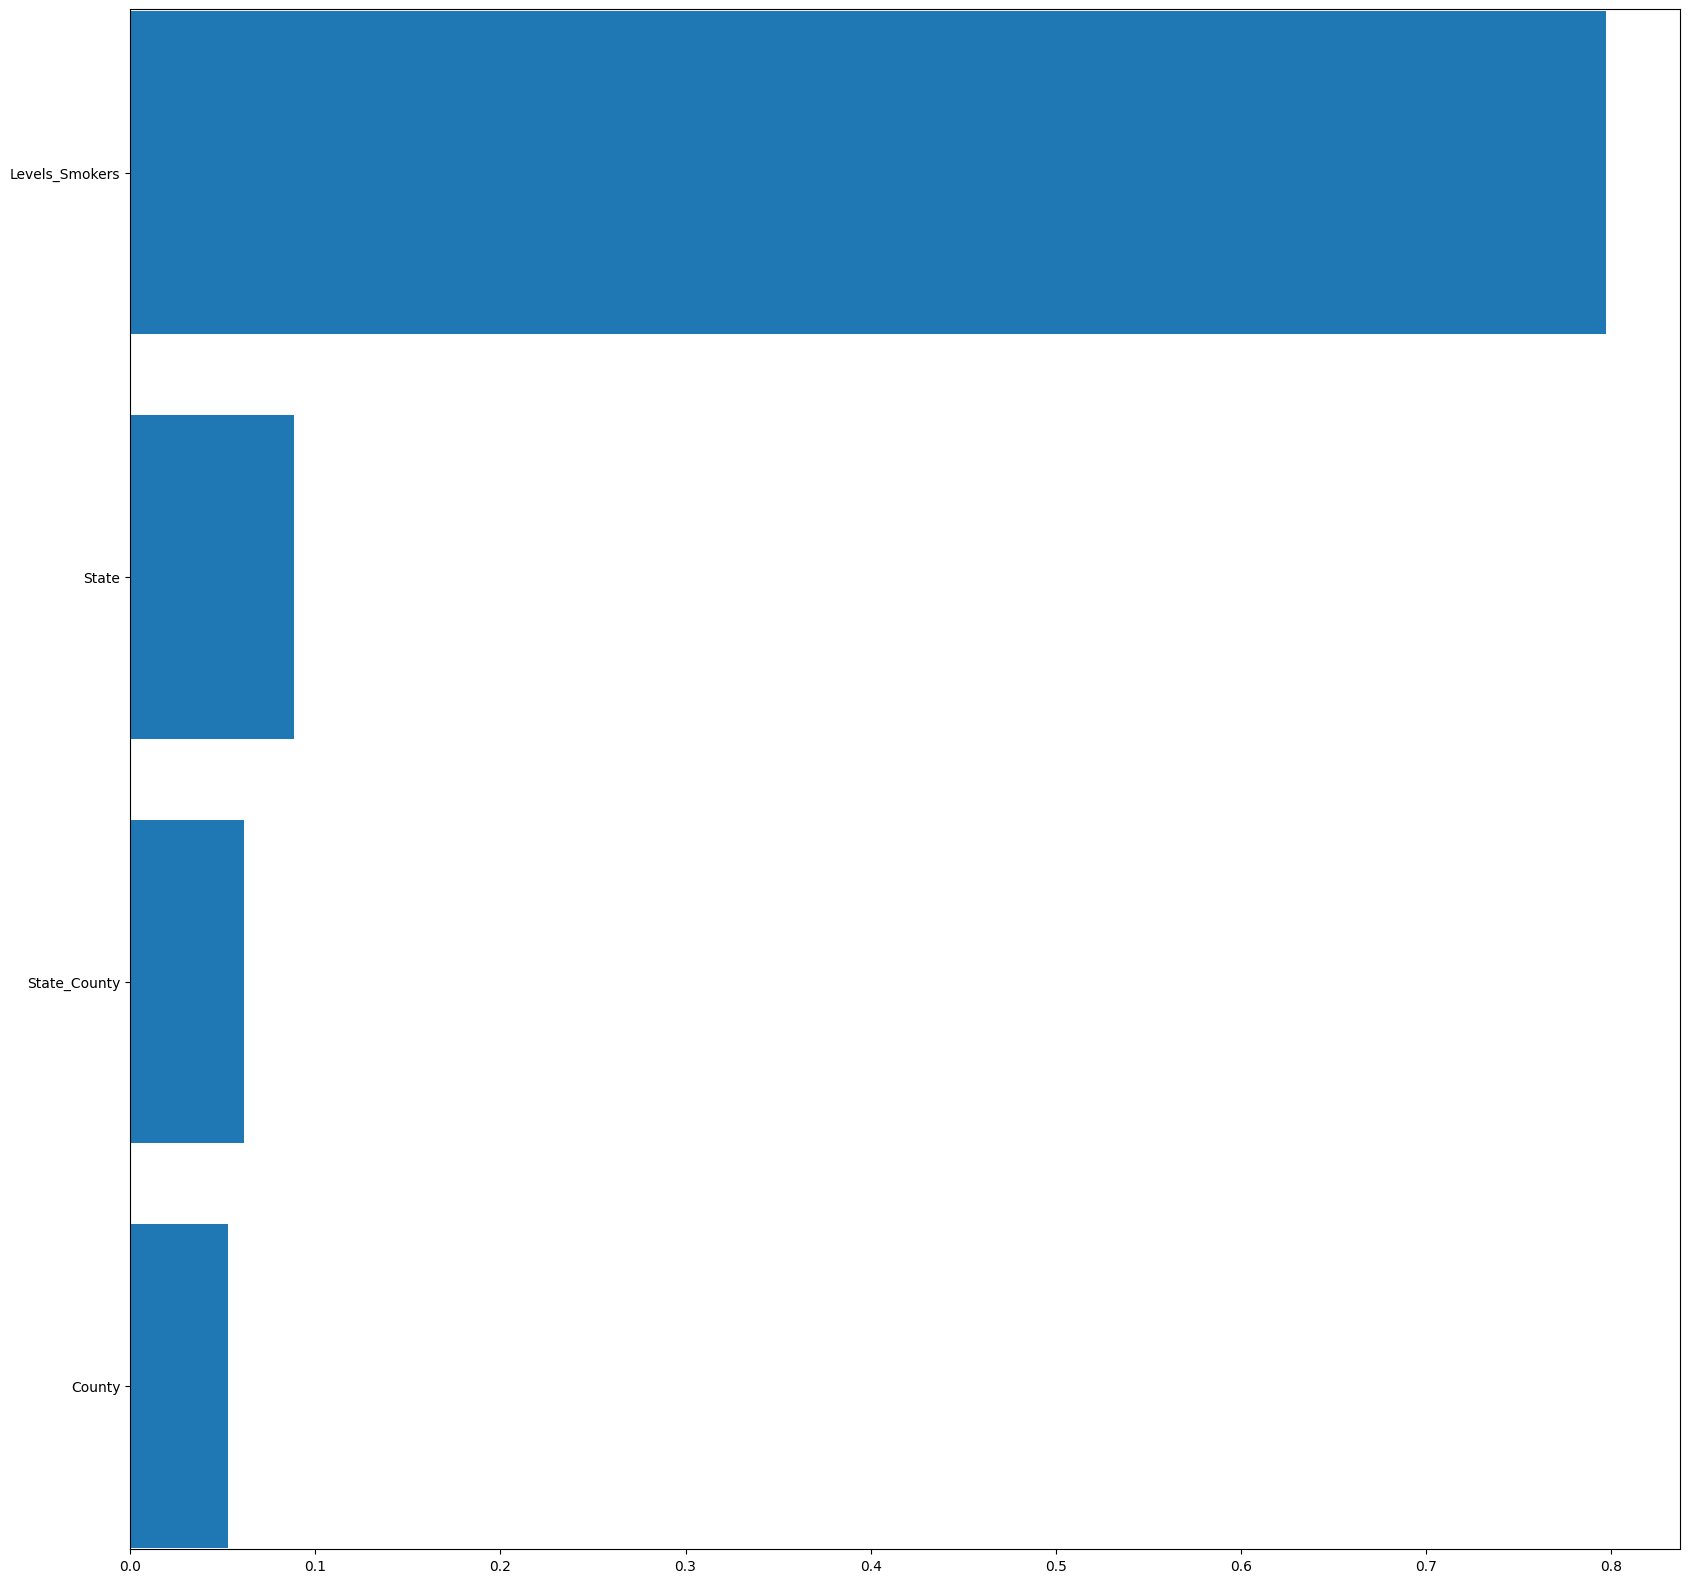

In [18]:
features = sorted(zip(X.columns, regressor.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]
fig, ax = plt.subplots()
fig.set_size_inches(20,20)
plt.margins(y=0.001)
ax.barh(y=cols, width=width)
plt.show()

In [19]:
regressor.score(X_test, y_test)

0.7640725902878368

In [20]:
# Step 5: Predicting the Results

y_pred = regressor.predict(X_test)

In [23]:
# Step 6: Comparing the Real Values with Predicted Values
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df.head(10)

,Real Values,Predicted Values
1868,10.2,8.69
510,11.7,11.37
1175,7.4,7.12
3054,6.9,6.99
65,6.5,5.17
478,9.9,9.04
286,13.9,11.04
1722,7.8,9.35
1635,11.5,9.98
897,9.2,9.70


ValueError: x and y must be the same size

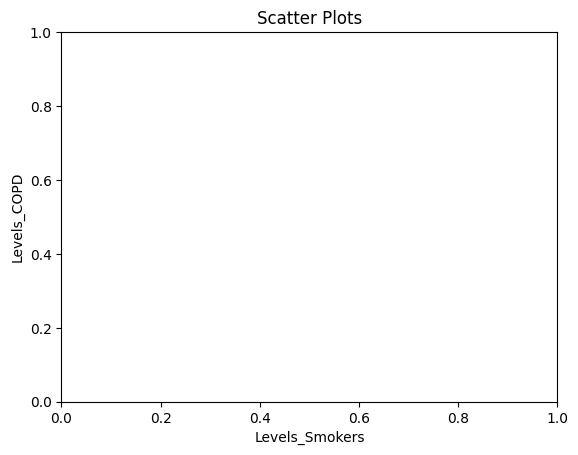

In [22]:
plt.title('Scatter Plots')
plt.xlabel('Levels_Smokers')
plt.ylabel('Levels_COPD')
plt.scatter(X, y)
plt.show()

In [ ]:
X.info()

In [ ]:
np.arange(X)

In [ ]:
# # Visualising the Random Forest Regression Results  
# 
X_grid = np.arange(int (float(min(X))), int(float(max(X))), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Levels_Smokers')
plt.ylabel('Levels_COPD')
plt.show()

In [ ]:
plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Random Forest Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

In [ ]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [ ]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [ ]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [ ]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
# Check the structure of the Sequential model
nn_model.summary()

In [ ]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

In [ ]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")